In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
class ImageConcat:
    def __init__(self, n_h, n_v, resolution=1000):
        self.n_h = n_h
        self.n_v = n_v
        self.r = resolution
        self.img = Image.new("RGB", (self.n_h*self.r, self.n_v*self.r))
        self.cursor = [0,0]    
    
    def move_cursor_h(self):
        self.cursor[0] += self.r
        
    def move_cursor_v(self):
        self.cursor[1] += self.r
        
    def reset_cursor_h(self):
        self.cursor[0] = 0
        
    def append_img(self, path):
        try:
            self.img.paste(Image.open(path).convert('RGB'), tuple(self.cursor))
        except:
            # print(f"Not Appended: {path}")
            pass
        
    def save_img(self, path):
        self.img.save(path)

In [3]:
import sys
import importlib

def call_module(nm, path):
    spec = importlib.util.spec_from_file_location(nm, path)
    foo = importlib.util.module_from_spec(spec)
    sys.modules[nm] = foo
    spec.loader.exec_module(foo)
    return foo

In [4]:
module = call_module('args', "/home/jupyter/ai_font/experiments/sample/args.py")
args = module.SampleArgs()

In [27]:
model_type = "oskar_fontdiffuser_training_phase_1"
datafd = "/home/jupyter/ai_font/data/zipfiles/raw/size96"
reportfd = "/home/jupyter/ai_font/data/report"
savefd = "/home/jupyter/ai_font/data/report2"

In [28]:
os.makedirs(savefd, exist_ok=True)

In [31]:
for model_type in [
    "vanilla_fontdiffuser_training_phase_1",
    "oskar_fontdiffuser_training_phase_1",
    "letterstrip_fontdiffuser_training_phase_1"]:
    failed_count = 0
    for s in ["seen","unseen"]:
        for font in args.test_fonts:
            contents = args.seens_ids if s == "seen" else args.unseens_ids
            for c in contents:
                try:
                    real = f"{datafd}/{s}/{font}__{c}.png"
                    files = [f"{reportfd}/{f}" for f in os.listdir(reportfd) if (f"c{c}" in f) & (font in f) & (model_type in f)]
                    bigimg = ImageConcat(n_h=10, n_v=12, resolution=100)
                    bigimg.append_img(real)
                    bigimg.reset_cursor_h()
                    bigimg.move_cursor_v()
                    bigimg.move_cursor_v()
                    cursori = 0
                    for _ in range(10):
                        for _ in range(10):
                            try:
                                bigimg.append_img(files[cursori])
                                bigimg.move_cursor_h()
                                cursori += 1
                            except:
                                pass
                        bigimg.reset_cursor_h()
                        bigimg.move_cursor_v()
                    bigimg.save_img(f"{savefd}/{model_type}__{font}__{s}__{c}.png")
                except:
                    failed_count += 1
                print(f"Failed:\t{failed_count}\t{model_type}__{font}__{s}__{c}\t\t\t", end="\r")

In [24]:
bigimg = ImageConcat(n_h=10, n_v=12, resolution=100)
bigimg.append_img(real)
bigimg.reset_cursor_h()
bigimg.move_cursor_v()
bigimg.move_cursor_v()
cursori = 0
for _ in range(10):
    for _ in range(10):
        try:
            bigimg.append_img(files[cursori])
            bigimg.move_cursor_h()
            cursori += 1
        except:
            pass
    bigimg.reset_cursor_h()
    bigimg.move_cursor_v()

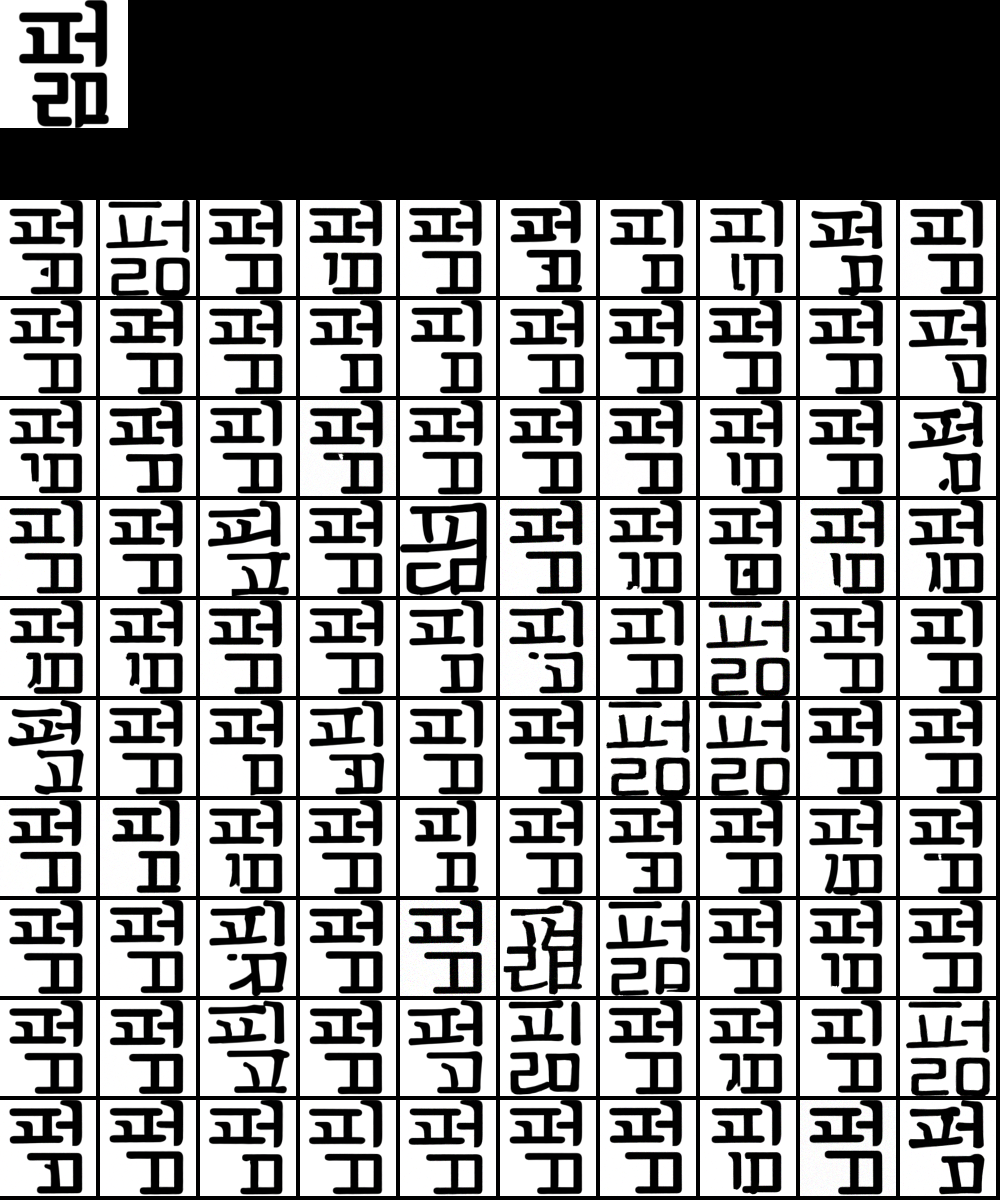

In [25]:
bigimg.img

In [19]:
[f"{reportfd}/{f}" for f in os.listdir(reportfd) if (f"c{c}" in f) & (font in f)]

['/home/jupyter/ai_font/data/report/oskar_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s9773.png',
 '/home/jupyter/ai_font/data/report/oskar_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s2819.png',
 '/home/jupyter/ai_font/data/report/oskar_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s571.png',
 '/home/jupyter/ai_font/data/report/oskar_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s10798.png',
 '/home/jupyter/ai_font/data/report/vanilla_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s5096.png',
 '/home/jupyter/ai_font/data/report/vanilla_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s2589.png',
 '/home/jupyter/ai_font/data/report/oskar_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s2594.png',
 '/home/jupyter/ai_font/data/report/vanilla_fontdiffuser_training_phase_1__SeoulHangang Jang B__unseen__c10118_s5471.png',
 '/home/jupyter/ai_font/da

In [14]:
model_type

'letterstrip_fontdiffuser_training_phase_1'

In [ ]:
Image.open(real)